Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Descriptive Statistics for EV Sales Quantity:
count    96845.000000
mean        37.108896
std        431.566675
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20584.000000
Name: EV_Sales_Quantity, dtype: float64

Vehicle Class Counts:
Vehicle_Class
MOTOR CAR                           4111
M-CYCLE/SCOOTER                     4101
GOODS CARRIER                       4096
MOTOR CAB                           3985
BUS                                 3813
                                    ... 
SEMI-TRAILER (COMMERCIAL)             18
X-RAY VAN                             12
MOTOR CYCLE/SCOOTER-WITH TRAILER       9
MODULAR HYDRAULIC TRAILER              3
MOTOR CARAVAN                          3
Name: count, Length: 73, dtype: int64

Vehicle Type Counts:
Vehicle_Type
Others                54423
2W_Personal         

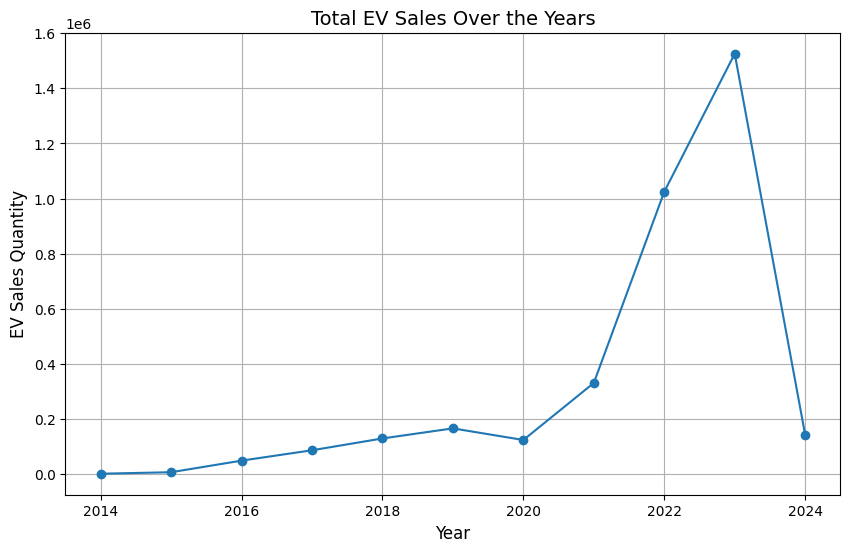

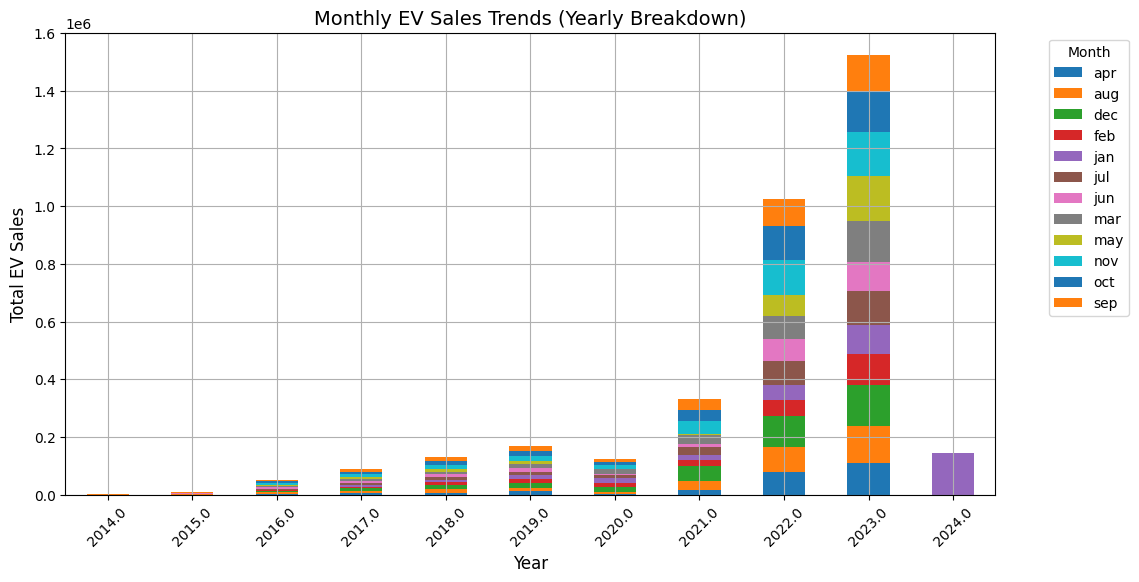

<Figure size 1200x600 with 0 Axes>

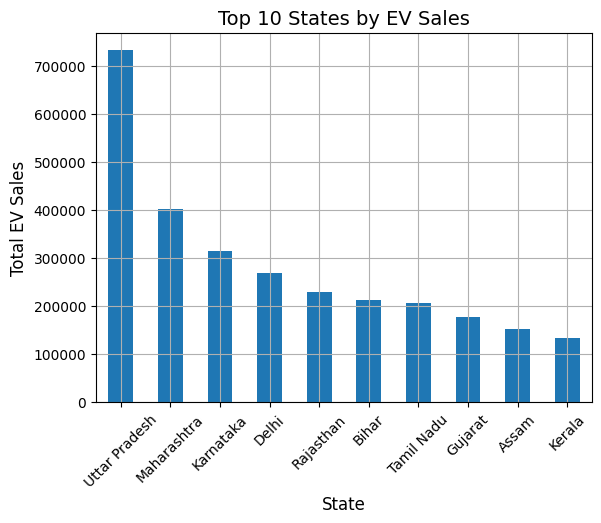

<Figure size 1200x600 with 0 Axes>

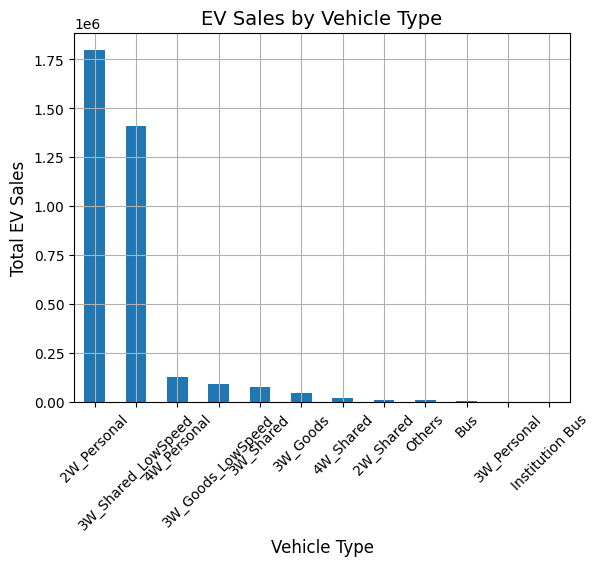

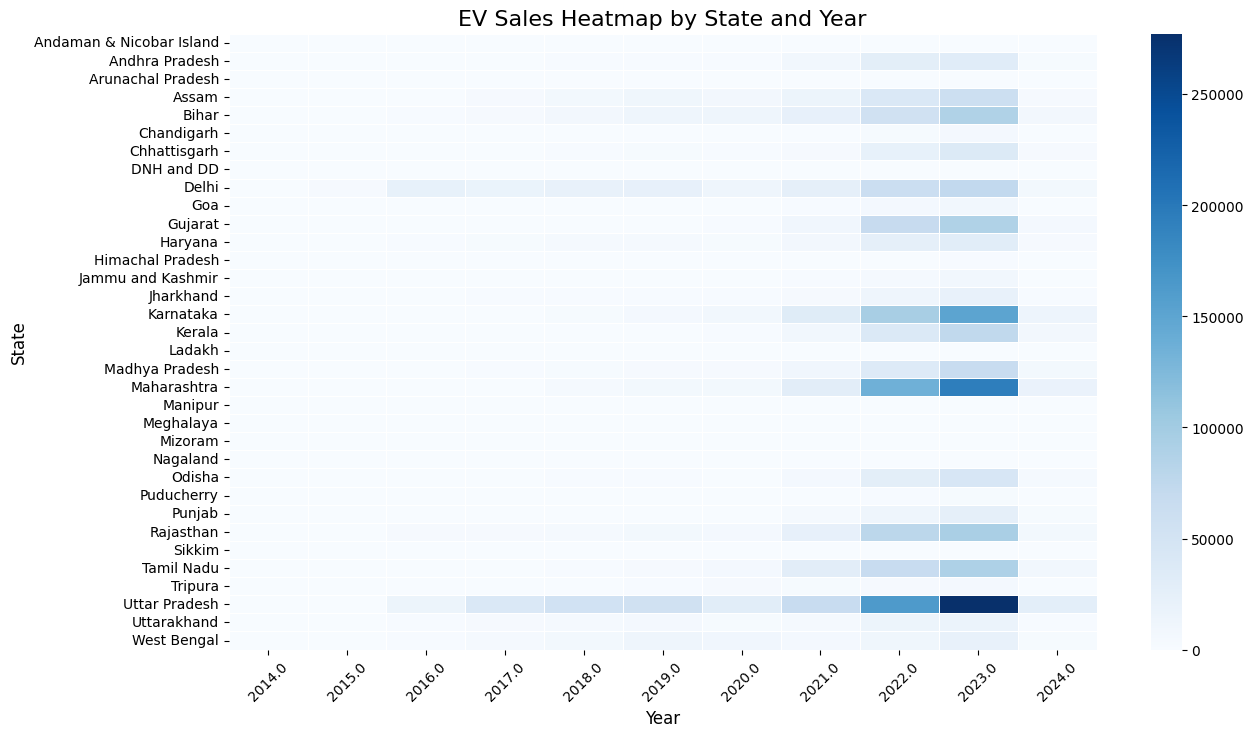

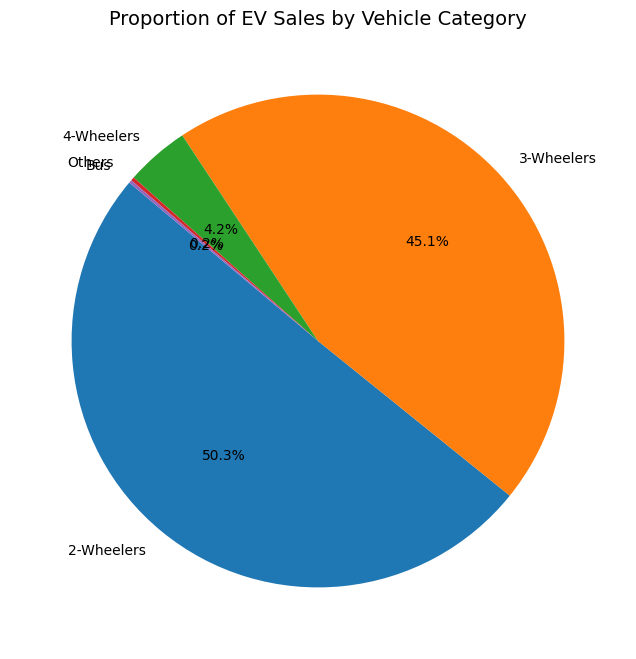

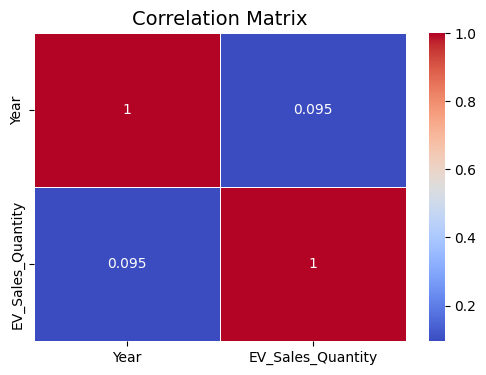

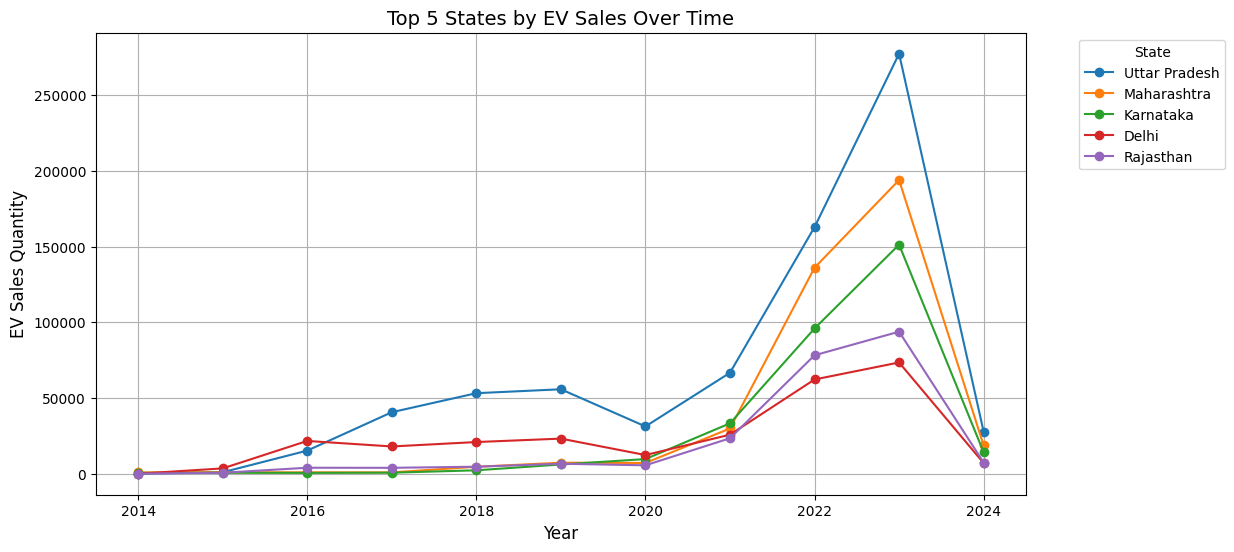

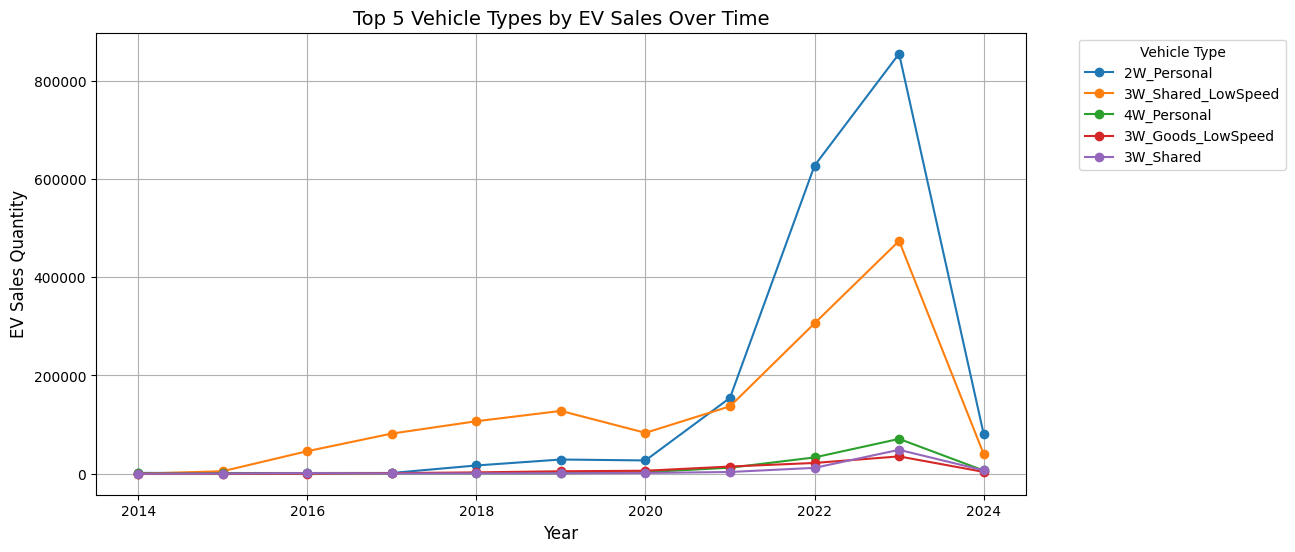

In [9]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/My Drive/dataa/data.csv'
df = pd.read_csv(file_path)

df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

desc_stats = df['EV_Sales_Quantity'].describe()
print("Descriptive Statistics for EV Sales Quantity:")
print(desc_stats)

print("\nVehicle Class Counts:")
print(df['Vehicle_Class'].value_counts())
,
print("\nVehicle Type Counts:")
print(df['Vehicle_Type'].value_counts())

print("\nState Counts:")
print(df['State'].value_counts())


print("Total EV Sales Over Time (Yearly)")
df_time_series = df.groupby(['Year', 'Month_Name'])['EV_Sales_Quantity'].sum().reset_index()

plt.figure(figsize=(10,6))
df_time_series.groupby('Year')['EV_Sales_Quantity'].sum().plot(kind='line', marker='o')
plt.title('Total EV Sales Over the Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.grid(True)
plt.show()


print(" Plotting EV Sales by State")
df_state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
df_state_sales.head(10).plot(kind='bar', x='State', y='EV_Sales_Quantity', legend=False)
plt.title('Top 10 States by EV Sales', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


print("Total EV Sales by Vehicle Type")
df_vehicle_type_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
df_vehicle_type_sales.plot(kind='bar', x='Vehicle_Type', y='EV_Sales_Quantity', legend=False)
plt.title('EV Sales by Vehicle Type', fontsize=14)
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Total EV Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


print("Heatmap of EV Sales by State and Year")
df_state_year_sales = df.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().unstack().fillna(0)

plt.figure(figsize=(14,8))
sns.heatmap(df_state_year_sales, cmap='Blues', annot=False, linewidths=0.5)
plt.title('EV Sales Heatmap by State and Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(rotation=45)
plt.show()


print("Proportion of Sales by Vehicle Category")
df_category_sales = df.groupby('Vehicle_Category')['EV_Sales_Quantity'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(8,8))
plt.pie(df_category_sales['EV_Sales_Quantity'], labels=df_category_sales['Vehicle_Category'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of EV Sales by Vehicle Category', fontsize=14)
plt.show()


correlation_matrix = df[['Year', 'EV_Sales_Quantity']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()


print("Top States and Vehicle Types Over Time")
df_top_states = df.groupby(['Year', 'State'])['EV_Sales_Quantity'].sum().unstack().fillna(0).T
top_states = df_top_states.sum(axis=1).nlargest(5).index

df_top_states.loc[top_states].T.plot(figsize=(12,6), marker='o')
plt.title('Top 5 States by EV Sales Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.legend(title='State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


df_top_vehicle_types = df.groupby(['Year', 'Vehicle_Type'])['EV_Sales_Quantity'].sum().unstack().fillna(0).T
top_vehicle_types = df_top_vehicle_types.sum(axis=1).nlargest(5).index

df_top_vehicle_types.loc[top_vehicle_types].T.plot(figsize=(12,6), marker='o')
plt.title('Top 5 Vehicle Types by EV Sales Over Time', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('EV Sales Quantity', fontsize=12)
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
